In [ ]:
"""
Faut avoir déjà choisi le type du modèle etc... non?
exploration
  charger dataset, 
  comparar la quantité de chaque type d'observations?

"""

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt

In [ ]:

mnist = fetch_openml('mnist_784', version=1)

In [ ]:
# dataset principal contenant les images
print (mnist.data.shape)

# Le vecteur d'annotations associé au dataset (nombre entre 0 et 9)
print (mnist.target.shape)

(70000, 784)
(70000,)


In [ ]:

data = mnist.data.values[:]
target = mnist.target.values[:]

In [ ]:
print(type(data))
print(type(target))
ds = pd.concat([pd.DataFrame(data), pd.DataFrame(target, dtype="category", columns=['res'])],axis = 1,)


<class 'numpy.ndarray'>
<class 'pandas.core.arrays.categorical.Categorical'>


In [ ]:
ds



,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,res
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [ ]:
(list(((ds["res"]).value_counts()).index))

['1', '7', '3', '2', '9', '0', '6', '8', '4', '5']

In [ ]:
df=ds
df["res"]=df["res"].astype("int64")
print(df.info())
df[df["res"]==5].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, 0 to res
dtypes: float64(784), int64(1)
memory usage: 419.2 MB
None


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,res
count,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,...,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0,6313.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
"""L'idée ici est de réunir un sous groupe de mes catégories, c'est basé sur le fait qu'on en veut le même nombre pour analyser correctement ensuite. 
Donc pour chaque valeurs possibles de res, j'en prend 500 aléatoires (downsampling) et je les ajoute à mon nouveau dataframme."""
dff = pd.DataFrame([], columns = list(df.columns))
for i in (list(((ds["res"]).value_counts()).index)):
  dff=pd.concat([dff,resample(df[df["res"]==int(i)], replace=True, n_samples=500, random_state=42)])
#dff.describe()
#(dff["res"]).value_counts()

In [ ]:
df=dff.astype(float)
xtrain, xtest, ytrain, ytest = train_test_split(df, df["res"], train_size=0.8)

In [ ]:
xtrain.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
780    float64
781    float64
782    float64
783    float64
res    float64
Length: 785, dtype: object

In [ ]:
xtrain =xtrain.astype(float)
xtest =xtest.astype(float)
ytrain =ytrain.astype(float)
ytest =ytest.astype(float)

knn = neighbors.KNeighborsClassifier(5)
knn.fit(xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


KNeighborsClassifier()

In [ ]:

error = 1 - knn.score(xtest, ytest)

print('Erreur: %f' % error)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Erreur: 0.068000


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

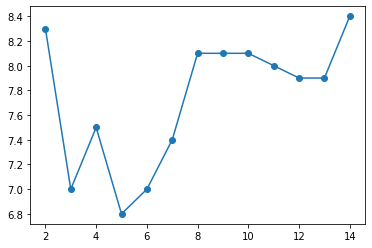

In [ ]:
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
plt.plot(range(2,15), errors, 'o-')
plt.show()

In [ ]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

error = 1 - knn.score(xtest, ytest)

print('Erreur: %f' % error)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


Erreur: 0.068000


In [ ]:
# On récupère le classifieur le plus performant
knn = neighbors.KNeighborsClassifier(4)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

# On redimensionne les données sous forme d'images
#images = xtest.reshape((-1, 28, 28))

# On selectionne un echantillon de 12 images au hasard
select = np.random.randint(images.shape[0], size=12)

# On affiche les images avec la prédiction associée
fig,ax = plt.subplots(3,4)

for index, value in enumerate(select):
    plt.subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format( predicted[value]) )

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


AttributeError: ignored